In [57]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import itertools # advanced tools
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric


In [48]:
#LOADING DATASET
fraud_data= pd.read_csv('creditcard3.csv')
fraud_data.drop('Time', axis = 1, inplace = True)
print(fraud_data.head())
print(fraud_data.describe())
print(fraud_data.info())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.1285

In [49]:
#TRANSACTION COUNT

cases = len(fraud_data)
nonfraud_count = len(fraud_data[fraud_data.Class == 0])
fraud_count = len(fraud_data[fraud_data.Class == 1])
fraud_percentage = round(fraud_count/nonfraud_count*100, 2)
print('TOTAL CASES:',cases)
print('--------------------------------------------')
print('TOTAL NON-FRAUD CASES:', nonfraud_count)
print('TOTAL FRAUD CASES:', fraud_count)
print('FRAUD PERCENTAGE:', fraud_percentage)


TOTAL CASES: 284807
--------------------------------------------
TOTAL NON-FRAUD CASES: 284315
TOTAL FRAUD CASES: 492
FRAUD PERCENTAGE: 0.17


In [50]:
 #NORMALIZING DATA

sc = StandardScaler()
amount = fraud_data['Amount'].values

fraud_data['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

print(fraud_data['Amount'].head(10))

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
5   -0.338556
6   -0.333279
7   -0.190107
8    0.019392
9   -0.338516
Name: Amount, dtype: float64


In [51]:
X = fraud_data.drop('Class', axis = 1).values
y = fraud_data['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print('X_train samples :', X_train[:1])
print('X_test samples :', X_test[0:1])
print('y_train samples :',y_train[0:20])
print('y_test samples :', y_test[0:20])

X_train samples : [[-1.11504743  1.03558276  0.80071244 -1.06039825  0.03262117  0.85342216
  -0.61424348 -3.23116112  1.53994798 -0.81690879 -1.30559201  0.1081772
  -0.85960958 -0.07193421  0.90665563 -1.72092961  0.79785322 -0.0067594
   1.95677806 -0.64489557  3.02038533 -0.53961798  0.03315649 -0.77494577
   0.10586781 -0.43085348  0.22973694 -0.0705913  -0.30145418]]
X_test samples : [[-0.32333357  1.05745525 -0.04834115 -0.60720431  1.25982115 -0.09176072
   1.1591015  -0.12433461 -0.17463954 -1.64440064 -1.11886302  0.20264731
   1.14596495 -1.80235956 -0.24717793 -0.06094535  0.84660574  0.37945439
   0.84726225  0.18640942 -0.20709827 -0.43389027 -0.26161328 -0.04665061
   0.2115123   0.00829721  0.10849443  0.16113917 -0.19330595]]
y_train samples : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
y_test samples : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [52]:
# MODELING

# 1. K-Nearest Neighbors

n = 5

knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(X_train, y_train)
knn_yhat = knn.predict(X_test)


# 2. Random Forest Tree

rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)



In [54]:
print('F1 SCORE:')
print('------------------------------------------------------------------------')
print('F1 score of the KNN model is',f1_score(y_test, knn_yhat))
print('F1 score of the Random Forest Tree model is', f1_score(y_test, rf_yhat))


F1 SCORE:
------------------------------------------------------------------------
F1 score of the KNN model is 0.8571428571428572
F1 score of the Random Forest Tree model is 0.7796610169491525


In [55]:
print('ACCURACY SCORE')
print('------------------------------------------------------------------------')
print('Accuracy score of the KNN model is ',accuracy_score(y_test, knn_yhat))

print('Accuracy score of the Random Forest Tree model is', accuracy_score(y_test, rf_yhat))

ACCURACY SCORE
------------------------------------------------------------------------
Accuracy score of the KNN model is  0.9995259997893332
Accuracy score of the Random Forest Tree model is 0.9993153330290369


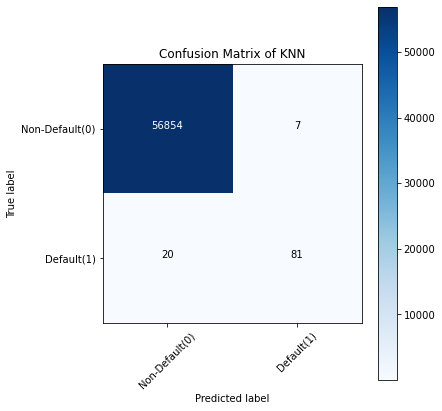

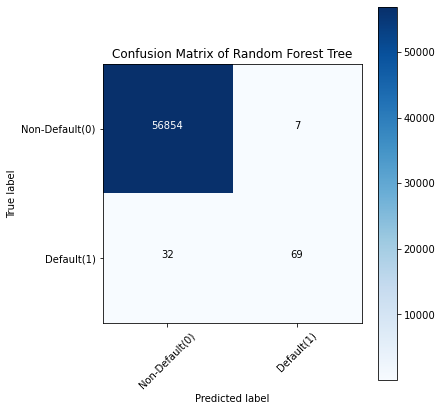

In [58]:
# 3. Confusion Matrix

# defining the plot function

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix for the models

knn_matrix = confusion_matrix(y_test, knn_yhat, labels = [0, 1]) # K-Nearest Neighbors
rf_matrix = confusion_matrix(y_test, rf_yhat, labels = [0, 1]) # Random Forest Tree

# Plot the confusion matrix

plt.rcParams['figure.figsize'] = (6, 6)

# 1. K-Nearest Neighbors

knn_cm_plot = plot_confusion_matrix(knn_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'KNN')
plt.savefig('knn_cm_plot.png')
plt.show()
# 2. Random forest tree

rf_cm_plot = plot_confusion_matrix(rf_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Random Forest Tree')
plt.savefig('rf_cm_plot.png')
plt.show()
